<a href="https://colab.research.google.com/github/MhmudAlpurd/AnimationApp/blob/master/hwrs002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [ ]:
import os, cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random as rnd
from tqdm import tqdm
import pickle as pkl
import PIL



**#path creation**


In [ ]:
DIRECTORY = 'Hampalai/HWRS_0_0_2/'
CATEGORIES = ['plastics', 'metal' , 'paper' , 'glass']
IMAGE_SIZE = 150

In [ ]:
img_tag_arr = []
images = []
tags = []

for category in tqdm(CATEGORIES):
    category_folder = os.path.join(DIRECTORY, category)
    img_label = CATEGORIES.index(category)
    for img in os.listdir(category_folder):
        image_path = os.path.join(category_folder, img)
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        img_loaded = cv2.resize(image, (IMAGE_SIZE,IMAGE_SIZE))
        img_loaded_normal = img_loaded / np.max(img_loaded) #image normalization
        img_loaded_normal.astype(np.float32)
        images.append(np.array(img_loaded_normal))
        tags.append(int(img_label))
        img_tag_arr.append([np.array(img_loaded), int(img_label)])

print()
print('max_img_loaded', np.max(img_loaded))
print('max_images', np.max(images))
print('image_tags', len(img_tag_arr))
print('image_arr', len(images))
print('tags_arr', len(tags))

100%|██████████| 4/4 [00:11<00:00,  2.85s/it]



max_img_loaded 255
max_images 1.0
image_tags 1987
image_arr 1987
tags_arr 1987


**#split image and labels and convert lst to arr**

(1987, 150, 150, 3)
(1987,)
[[[0.76666667 0.81666667 0.85833333]
  [0.78333333 0.82916667 0.87083333]
  [0.77916667 0.82916667 0.87083333]
  ...
  [0.725      0.77916667 0.8125    ]
  [0.725      0.77916667 0.8125    ]
  [0.725      0.77916667 0.8125    ]]

 [[0.77083333 0.82083333 0.8625    ]
  [0.77916667 0.82916667 0.87083333]
  [0.77916667 0.82916667 0.87083333]
  ...
  [0.725      0.77916667 0.8125    ]
  [0.725      0.77916667 0.8125    ]
  [0.725      0.77916667 0.8125    ]]

 [[0.775      0.825      0.86666667]
  [0.775      0.825      0.86666667]
  [0.77916667 0.82916667 0.87083333]
  ...
  [0.73333333 0.77916667 0.8125    ]
  [0.73333333 0.77916667 0.8125    ]
  [0.73333333 0.77916667 0.8125    ]]

 ...

 [[0.7        0.7625     0.775     ]
  [0.7125     0.775      0.7875    ]
  [0.70833333 0.77083333 0.78333333]
  ...
  [0.65       0.70416667 0.7375    ]
  [0.65       0.70416667 0.7375    ]
  [0.64166667 0.69583333 0.72916667]]

 [[0.7        0.7625     0.775     ]
  [0.7083

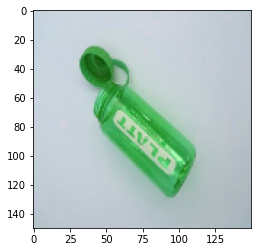

In [ ]:
X = []
y = []

for img_tensor, labels in img_tag_arr:
    X.append(img_tensor) #X = image tensor
    y.append(labels) #y = label list

X = np.array(X)
y = np.array(y)

#pkl.dump(X, open('X.pkl', 'wb'))
#pkl.dump(y, open('y.pkl', 'wb'))

#X = pkl.load(open('X.pkl', 'rb'))
#y = pkl.load(open('y.pkl', 'rb'))



print(X.shape)
print(y.shape)
print(X[0])
print(y[0])

#show the image (plastics: 0, metal: 1, paper: 2, glass:3)
plt.imshow(X[0])





In [ ]:
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical

img_train, img_test, tag_train, tag_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('img_train:', len(img_train), type(img_train[0]), '| img_test:', len(img_test), '| lbl_train:', len(lbl_train), type(lbl_train[0]) , '| lbl_test:', len(lbl_test))

print(img_train.shape)
print(tag_train.shape)
print(img_test.shape)
print(tag_test.shape)

img_train: 1589 <class 'numpy.ndarray'> | img_test: 398 | lbl_train: 1589 <class 'numpy.ndarray'> | lbl_test: 398


**#ImageDataGenerator**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True, samplewise_center=True,
    featurewise_std_normalization=True, samplewise_std_normalization=True,
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.1, zoom_range=0.2,
    channel_shift_range=0.2, fill_mode='nearest', cval=0.1, horizontal_flip=True,
    vertical_flip=True , rescale=True

)

datagen.fit(img_train)


**#model creation**

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import SGD, Adam
from keras.losses import categorical_crossentropy




num_classes = 4

myModel = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
myModel.summary()

myModel.compile(loss = 'binary_crossentropy', optimizer= optimizer_2, metrics=['accuracy'])
myModel.fit(x=datagen.flow(img_train, tag_train, batch_size=32),validation_data=(img_test, tag_test),epochs=100, verbose=1)








Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 18, 18, 64)       

KeyboardInterrupt: ignored